In [1]:
#!pip install xgboost

In [2]:
#Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Machine_Learning/main/Ensemble%20Method/Wine.csv")

In [5]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


<Axes: xlabel='Customer_Segment', ylabel='count'>

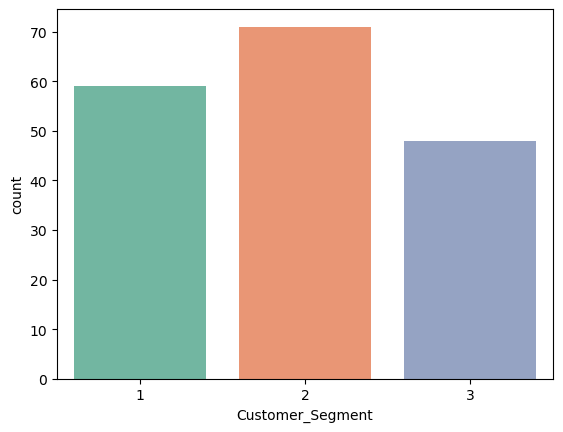

In [6]:
sns.countplot(x=df['Customer_Segment'], palette='Set2')

# Model Building

In [8]:
x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3, random_state=42)

In [10]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f"Train: {dt.score(xtrain,ytrain)}")
print(f"Test: {dt.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 1.0
Test: 0.9444444444444444
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



In [11]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(f"Train: {lg.score(xtrain,ytrain)}")
print(f"Test: {lg.score(xtest,ytest)}")
print(classification_report(ytest,ypred))

Train: 0.9596774193548387
Test: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Automating Model Building

In [13]:
def prediction(model):
    model.fit(xtrain,ytrain)
    yp = model.predict(xtest)
    print(f"Train: {model.score(xtrain,ytrain)}")
    print(f"Test: {model.score(xtest,ytest)}")
    print(classification_report(ytest,yp))

In [14]:
prediction(DecisionTreeClassifier())

Train: 1.0
Test: 0.9629629629629629
              precision    recall  f1-score   support

           1       0.95      0.95      0.95        19
           2       0.95      1.00      0.98        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [15]:
prediction(LogisticRegression())

Train: 0.9596774193548387
Test: 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [16]:
prediction(RandomForestClassifier())

Train: 1.0
Test: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [17]:
prediction(GradientBoostingClassifier())

Train: 1.0
Test: 0.9074074074074074
              precision    recall  f1-score   support

           1       0.86      1.00      0.93        19
           2       0.90      0.90      0.90        21
           3       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



In [18]:
prediction(BaggingClassifier(estimator=LogisticRegression(), n_estimators=20))

Train: 0.9596774193548387
Test: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
prediction(KNeighborsClassifier())

Train: 0.7741935483870968
Test: 0.7407407407407407
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.75      0.71      0.73        21
           3       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [21]:
prediction(BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20))

Train: 0.8064516129032258
Test: 0.7037037037037037
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        19
           2       0.74      0.67      0.70        21
           3       0.47      0.50      0.48        14

    accuracy                           0.70        54
   macro avg       0.68      0.69      0.68        54
weighted avg       0.71      0.70      0.70        54



In [22]:
prediction(BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100))

Train: 1.0
Test: 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      0.95      0.97        19
           2       0.91      1.00      0.95        21
           3       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



# Fine Tuning Model

In [24]:
params = {'n_estimators': [90,110,150], 'learning_rate':[0.5,0.6,0.7,0.9,1], 'max_depth':[3,5,7,11]}

In [25]:
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.6, 0.7, 0.9, 1],
                         'max_depth': [3, 5, 7, 11],
                         'n_estimators': [90, 110, 150]},
             verbose=1)

In [26]:
grid.best_params_

{'learning_rate': 0.9, 'max_depth': 3, 'n_estimators': 90}

In [27]:
prediction(GradientBoostingClassifier(learning_rate= 0.9, max_depth= 3, n_estimators= 90))

Train: 1.0
Test: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [28]:
df['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [31]:
ytrain

138    3
104    2
78     2
36     1
93     2
      ..
71     2
106    2
14     1
92     2
102    2
Name: Customer_Segment, Length: 124, dtype: int64

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.3, random_state=42)

In [33]:
prediction(XGBClassifier())

Train: 1.0
Test: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.95      0.95      0.95        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



In [34]:
#Perform Hyperparameter Tuning for XGB

In [35]:
params = {'n_estimators': [90,105,140], 'learning_rate':[0.1,0.3,0.5,0.8,1], 'max_depth':[3,7,12,15]}

In [36]:
grid = GridSearchCV(XGBClassifier(), param_grid=params, verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
                         'max_depth': [3, 7, 12, 15],
                         'n_estimators': [90, 105, 140]},
             verbose=1)

In [37]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 90}

In [38]:
prediction(GradientBoostingClassifier(learning_rate= 0.1, max_depth= 3, n_estimators= 90))

Train: 1.0
Test: 0.9074074074074074
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        19
           1       0.90      0.90      0.90        21
           2       1.00      0.79      0.88        14

    accuracy                           0.91        54
   macro avg       0.92      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



# Stacking

In [40]:
models = []
models.append(('lg',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))                           #CART
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))        #C5.0

In [41]:
models

[('lg', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy'))]

In [42]:
prediction(StackingClassifier(estimators = models, final_estimator = RandomForestClassifier(max_depth=5)))

Train: 0.9838709677419355
Test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

